In [22]:
import pandas as pd
import numpy as np


%pylab inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import time

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import roc_auc_score

%pylab inline
data=None
def absolute_correlations(col, df=data):
    #absolute_values = np.abs(df[col])
    corrs = pd.DataFrame(df.select_dtypes(include=[np.number]).corrwith(df[col]), columns=['correlation'])
    corrs['absol'] = np.abs(corrs['correlation'])
    return corrs.sort_values('absol', ascending=False).drop('absol', axis=1).tail(len(corrs)-1)

def numeric(self):
    '''Monkey-patches numeric features'''
    return self.select_dtypes(include=[np.number])
pd.DataFrame.numeric = numeric

Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib


In [23]:
# data = pd.DataFrame()

from warnings import filterwarnings
filterwarnings('ignore')

In [24]:
data = pd.read_csv('magic_stompy2018.csv')
data = data[[i for i in data.columns if 'Unnamed' not in i]]

meta_stats = ['won', 'life', 'opponents_life', 'deck', 'deck_size', 'computer', 'starting_lands', 'opponents_level']
cards = [i for i in data.columns if i not in meta_stats]

In [78]:
# Timestamp
now = len(data)

# How close I got to winning
data.set_value(now, 'won', 1)
data.set_value(now, 'life', 9)
data.set_value(now, 'opponents_life', 0)
data.set_value(now, 'deck_size', 60)
data.set_value(now, 'starting lands', 2)
data.set_value(now, 'land rating', 3)
data.set_value(now, 'archetype', 'rdw')

# creatures
data.set_value(now, 'drover of the mighty', 0)
data.set_value(now, 'druid of the cowl', 0)
data.set_value(now, 'feral prowler', 0)
data.set_value(now, 'dryad greenseeker', 0)
data.set_value(now, 'greenbelt rampager', 1)
data.set_value(now, 'initiates companion', 0)
data.set_value(now, 'llanowar elves', 1)
data.set_value(now, 'mouth', 0)
data.set_value(now, 'old growth dryads', 0)
data.set_value(now, 'rishkar', 0)
data.set_value(now, 'ripjaw raptor', 0)
data.set_value(now, 'steel life champion', 1)
data.set_value(now, 'thrashing brontodon', 0)
data.set_value(now, 'vine mare', 1)
data.set_value(now, 'walking ballista', 0)

# Artifacts
data.set_value(now, 'aethersphere harvester', 0)
data.set_value(now, 'lifecrafters bestiary', 0)
data.set_value(now, 'skysovereign', 0)
data.set_value(now, 'scrapheap scrounger', 1)
data.set_value(now, 'heart of kiran', 1)

# Spells
data.set_value(now, 'adventurous impulse', 0)
data.set_value(now, 'blanchwood armor', 0)
data.set_value(now, 'blossoming defense', 1)
data.set_value(now, 'cartouche of strength', 0)
data.set_value(now, 'colossal majesty', 0)
data.set_value(now, 'natures way', 0)
data.set_value(now, 'plummet', 0)
data.set_value(now, 'rabid bite', 0)
data.set_value(now, 'rishkars expertise', 0)
data.set_value(now, 'savage stomp', 0)
data.set_value(now, 'song of freyalise', 0)
data.set_value(now, 'thunderherd migration', 0)
data.set_value(now, 'titanic growth', 0)

data.set_value(now, 'verdant rebirth', 0)
data.set_value(now, 'vivien reid', 0)

# Big boys
data.set_value(now, 'aggressive mamoth', 0)
data.set_value(now, 'ghalta', 0)
data.set_value(now, 'gigantosaurus', 0)
data.set_value(now, 'majestic myriarch', 0)
data.set_value(now, 'rhonas', 0)
data.set_value(now, 'scaled behemoth', 0)
data.set_value(now, 'shalai', 0)
data.set_value(now, 'verdurous gearhulk', 0)
data = data.fillna(0.)

data.to_csv('magic_stompy2018.csv')

In [79]:
data.mean()

won                        0.521127
life                       8.204225
opponents_life             8.619718
deck_size                 60.000000
starting lands             2.788732
druid of the cowl          0.098592
llanowar elves             0.859155
steel life champion        0.887324
vine mare                  0.873239
blanchwood armor           0.084507
lifecrafters bestiary      0.225352
natures way                0.098592
plummet                    0.183099
rabid bite                 0.464789
titanic growth             0.098592
verdant rebirth            0.154930
gigantosaurus              0.309859
majestic myriarch          0.098592
verdurous gearhulk         0.070423
scaled behemoth            0.070423
ghalta                     0.267606
land rating                2.985915
walking ballista           0.112676
colossal majesty           0.394366
aggressive mamoth          0.000000
rhonas                     0.366197
mouth                      0.000000
blossoming defense         0

In [16]:
# creatures = ['oketra', 'rhonas', 'serpopard', 'pacifist', 'baloth pup', 'mouth', 'croc',
# 'exemplar', 'defiant greatmaw', 'glorybound initiate', 'initiates companion',]

# removal = ['gideons reproach', 'reprisal', 'declare in stone', 'prepare']

# data['creatures_total'] = data[creatures].sum(axis=1)
# data['removal_total'] = data[removal].sum(axis=1)

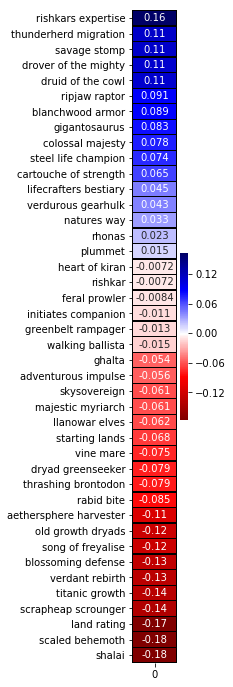

In [81]:
meta_stats = ['won', 'life', 'archetype', 'opponents_life', 'deck', 'deck_size', 'computer', 'starting_lands', 'opponents_level']
cards = [i for i in data.columns if i not in meta_stats]

winning_cards = data[cards].corrwith(data['won'])
winning_cards = pd.DataFrame(winning_cards).dropna().sort_values(0, ascending=False)

plt.figure(figsize=(1,12))

sns.heatmap(winning_cards,
           annot=True, cmap='seismic_r', linecolor='black',
           linewidths=.25, center=0)

In [82]:
from scipy import stats
sleep = []
for i in data.select_dtypes(include=[np.number]).drop(['life', 'opponents_life'], axis=1).columns:
    c = stats.pearsonr(data['won'], data[i])
    if c[1] < .15:
        if c[0] < .99:
            sleep.append([i, c[0], c[1]])


sleep = pd.DataFrame(sleep, columns=['card', 'corr', 'pvalue'])
sleep['absol'] = np.abs(sleep['corr'])

sleep.sort_values('absol', ascending=False).drop('absol', axis=1)

,card,corr,pvalue
0,scaled behemoth,-0.176932,0.139925
2,shalai,-0.176932,0.139925
1,land rating,-0.174295,0.146024


In [83]:
cards = [
    'drover of the mighty',
    'druid of the cowl',
    'feral prowler',
    'dryad greenseeker',
    'greenbelt rampager',
    'initiates companion',
    'llanowar elves',
    'mouth',
    'old growth dryads',
    'rishkar',
    'steel life champion',
    'thrashing brontodon',
    'vine mare',
    'walking ballista',
    'aethersphere harvester',
    'lifecrafters bestiary',
    'skysovereign',
    'scrapheap scrounger',
    'heart of kiran',
    'adventurous impulse',
    'blanchwood armor',
    'blossoming defense',
    'cartouche of strength',
    'colossal majesty',
    'natures way',
    'plummet',
    'rabid bite',
    'rishkars expertise',
    'savage stomp',
    'song of freyalise',
    'thunderherd migration',
    'titanic growth',
    'verdant rebirth',
    'vivien reid',
    'aggressive mamoth',
    'ghalta',
    'gigantosaurus',
    'majestic myriarch',
    'rhonas',
    'scaled behemoth',
    'shalai',
    'verdurous gearhulk',
]

In [84]:
combinations = pd.DataFrame()

for i in cards:
    for j in cards:
        if i > j:
            combinations[i + ' + ' + j] = data[i] + data[j]

In [85]:
from scipy import stats
sleep = []
for i in combinations.columns:
    c = stats.pearsonr(data['won'], combinations[i])
    if c[1] < .1:
        if c[0] < .99:
            sleep.append([i, c[0], c[1]])


sleep = pd.DataFrame(sleep, columns=['card', 'corr', 'pvalue'])
sleep['absol'] = np.abs(sleep['corr'])

sleep.sort_values('absol', ascending=False).drop('absol', axis=1)

,card,corr,pvalue
10,shalai + scaled behemoth,-0.260273,0.028372
6,verdant rebirth + shalai,-0.225251,0.058938
3,titanic growth + scaled behemoth,-0.223389,0.061118
4,titanic growth + shalai,-0.223389,0.061118
0,song of freyalise + scaled behemoth,-0.215578,0.070990
7,scaled behemoth + old growth dryads,-0.215578,0.070990
1,song of freyalise + shalai,-0.215578,0.070990
8,shalai + old growth dryads,-0.215578,0.070990
5,verdant rebirth + scaled behemoth,-0.209017,0.080234
9,shalai + scrapheap scrounger,-0.204854,0.086581


In [17]:
# Machine learning

In [86]:
x = data[cards]
y = data['won']

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_score

kf = StratifiedKFold(n_splits=3)

param_grid = {
    'max_depth': np.arange(2,21),
    'min_samples_leaf': [1,2,3,4,5,10],
    'min_samples_split': np.arange(2,6),
}

clf = DecisionTreeClassifier()

grid = GridSearchCV(clf, param_grid=param_grid, cv=kf, scoring='roc_auc').fit(x, y)
clf = grid.best_estimator_

clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [87]:
cv = cross_val_score(clf, x, y, cv=kf, scoring='roc_auc')

print('Mean:', cv.mean())
print('Std dev:', cv.std())

Mean: 0.5315656565656566
Std dev: 0.07577861660668517


# Template

In [62]:
# Timestamp
now = len(data)

# How close I got to winning
data.set_value(now, 'won', )
data.set_value(now, 'life', )
data.set_value(now, 'opponents_life', )
data.set_value(now, 'deck_size', 60)
data.set_value(now, 'starting lands', )
data.set_value(now, 'land rating', )
data.set_value(now, 'archetype', '')

# creatures
data.set_value(now, 'drover of the mighty', 0)
data.set_value(now, 'druid of the cowl', 0)
data.set_value(now, 'feral prowler', 0)
data.set_value(now, 'dryad greenseeker', 0)
data.set_value(now, 'greenbelt rampager', 0)
data.set_value(now, 'initiates companion', 0)
data.set_value(now, 'llanowar elves', 0)
data.set_value(now, 'mouth', 0)
data.set_value(now, 'old growth dryads', 0)
data.set_value(now, 'rishkar', 0)
data.set_value(now, 'ripjaw raptor', 0)
data.set_value(now, 'steel life champion', 0)
data.set_value(now, 'thrashing brontodon', 0)
data.set_value(now, 'vine mare', 0)
data.set_value(now, 'walking ballista', 0)

# Artifacts
data.set_value(now, 'aethersphere harvester', 0)
data.set_value(now, 'lifecrafters bestiary', 0)
data.set_value(now, 'skysovereign', 0)
data.set_value(now, 'scrapheap scrounger', 0)

# Spells
data.set_value(now, 'adventurous impulse', 0)
data.set_value(now, 'blanchwood armor', 0)
data.set_value(now, 'blossoming defense', 0)
data.set_value(now, 'cartouche of strength', 0)
data.set_value(now, 'colossal majesty', 0)
data.set_value(now, 'natures way', 0)
data.set_value(now, 'plummet', 0)
data.set_value(now, 'rabid bite', 0)
data.set_value(now, 'rishkars expertise', 0)
data.set_value(now, 'savage stomp', 0)
data.set_value(now, 'song of freyalise', 0)
data.set_value(now, 'thunderherd migration', 0)
data.set_value(now, 'titanic growth', 0)

data.set_value(now, 'verdant rebirth', 0)
data.set_value(now, 'vivien reid', 0)

# Big boys
data.set_value(now, 'aggressive mamoth', 0)
data.set_value(now, 'ghalta', 0)
data.set_value(now, 'gigantosaurus', 0)
data.set_value(now, 'majestic myriarch', 0)
data.set_value(now, 'rhonas', 0)
data.set_value(now, 'scaled behemoth', 0)
data.set_value(now, 'shalai', 0)
data.set_value(now, 'verdurous gearhulk', 0)
data = data.fillna(0.)

data.to_csv('magic_stompy2018.csv')